<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(10,6)})

from pandas.core.common import random_state

In [56]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [57]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 4.1 범주형 변수

성별, 학력, 고용형태 와 같은 정보는 범주현 특성에 속한다. 이는 크기, 나이와 같은 연속형 특성과 구분된다. 즉 정량적이 아닌 정성적 속성이다.

### 4.1.1 원-핫-인코딩(가변수)
범주형 변수를 표현하는 데 가장 널리 쓰이는 방법은 원-핫-인코딩이다. 이를 가변수라고도 한다. 이는 범주형 변수를 0또는 1값을 가진 하나 이상의 새로운 특성으로 바꾼것이다.

In [58]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 문자열로된 범주형 데이터 확인하기
이처럼 데이터셋을 읽고 나면, 먼저 열에 어떤 의미있는 범주형 데이터가 있는지 확인해보는 것이 좋다. 사용자로 부터 입력받은 데이터를 다룰 때는 정해진 범주 밖의 값이 있을 수도 있고 철자나 대소문자가 틀려서 데이터를 전처리해야 할 수 있다. male or man
열의 내용을 확인하는 방법은 pandas value_counts 메서드를 활용하는 방법이다.

In [59]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


수정할 사항이 없다. 실제로은 value 값들을 살펴보고 그 값들을 수정해야 할 때가 많지만 여기서는 넘어가겠다.
pandas 에서 get_dummies 함수를 사용한다면 데이터를 매우 쉽게 인코딩할 수 있다. 해당 함수는 객체 타입이나 범추령을 가진 열을 자동으로 변환해준다.

In [60]:
print("orign data feature:\n", list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print("get dummise feature: \n", list(data_dummies.columns))

orign data feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get dummise feature: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct

In [61]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [62]:
# 타깃값 분리

features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [63]:
# 모델 학습

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print('test score: {:.2f}'.format(logreg.score(X_test, y_test)))

test score: 0.81


data 특성을 몇가지 더 추가하고 기존 연속형을 범주형 age > 20. 30 .40. 50... 등으로 변경해보면 어떨까.


## 4.1.2 숫자로 표현된 범주형 특성

adult 데이터셋의 경우 범주형 변수가 문자열로 인코딩되어 있다. 철자 오류가 날 수 있지만. 다른 한편 변수가 범우형이란 것을 확실하게 알려준다. 하지만 여러 이유로 범주형 변수가 숫자로 인코딩된 경우가 많다.(0,1,2 으로 체크박스 표시순 등으로)

\
pandas 의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않는다. 

In [64]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만든다.
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1], '범주형 특성':['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [65]:
# get_dummies 함수. 문자열 특성만 인코딩됨, 숫자는 그대로
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [66]:
# '숫자 특성'도 가변수로 만들고 싶다면 columms 매개변수에 인코딩하고 싶은 열을 명시한다.
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 4.2 OneHotEncoder 와 ColumnTransformer: scikit-learn, 범주형 변수 다루기

scikit-learn 은 원-핫-인코딩을 수행할 수 있다. 사이킷에선 훈련셋 테스트셋를 같은 방식으로 다루기 쉬운 것이 장점이다. 원-핫-인코딩은, OneHotEncoder 클래스에 구현되어 있다. OneHotEncoder은 모든 열에 인코딩을 수행한다.

In [67]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파이 배열으 반환한다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


문자 숫자 특성이 모두 변환되었다. sklearn-learn 출력은 DataFrame 이 아니기 때문에 열 이름이 없다. 특성에 해당하는 원본 범주형 변수 이름을 얻으려면 get_feature_names_out

In [68]:
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


원핫인코딩은 모든 특성을 범수형이라고 가정하기 때문에 애플리케이션에 바로 적용할 수는 없다. 그렇기 때문에 ColumnsTransformer 클래스가 필요하다. 이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있다. 

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [('sclaing', StandardScaler(), ['age', 'hours-per-week']), 
     ('onehot', OneHotEncoder(sparse=False),
     ['workclass', 'education', 'gender', 'occupation'])])

In [70]:
# income을 제외한 모든 열을 추출한다.
data_features = data.drop('income', axis=1)
# df 과 income 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [71]:
X_train_trans

array([[ 1.499, -0.445,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 2.38 , -1.668,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.25 , -0.037,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-1.146, -0.037,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [ 0.471,  0.37 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.999,  0.615,  0.   , ...,  0.   ,  0.   ,  0.   ]])

pd.get_dummies를 사용했을 때와 비슷 44개의 특성 만들어짐. 연속형 스케일 조정했다는 것만 다르다.


In [72]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("test score : {:.2f}".format(logreg.score(X_test_trans, y_test)))

test score : 0.81


데이터 스케일이 영향을 미치지 못했다. 하나의 변환기로 모든 전처리 단계를 캡슐화 하면 장점이 더 있다. 나중에 더 알아보자.
ColumnsTransformer 안이 단계에 접근하려면 named_transformers_ 속성을 사용한다.

In [73]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

# 4.3 make_column_transformer로 간단하게 ColumnTransformer 만들기

클래스 이름을 기반으로 자동으로 각 단계의 이름을 붙여주는 함수. make_column_transfromer 함수

In [74]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'] ))

# 4.4 분할 구간, 이산화 그리고 선형 모델, 트리 모델

데이터를 잘 표현하는 방법은 데이터의 의미를 이해하고 거기에 맞은 모델을 사용하는 것이다. 폭 넓게 사용하는 알고리즘, 선형모델과 트리기반 모델(결정,그레디,랜덤 트리 등)은 특성 표현 방식으로 인해 미치는 영향이 매우 다르다. 2장에서 사용한 wave 데이터셋을 다시 보자.

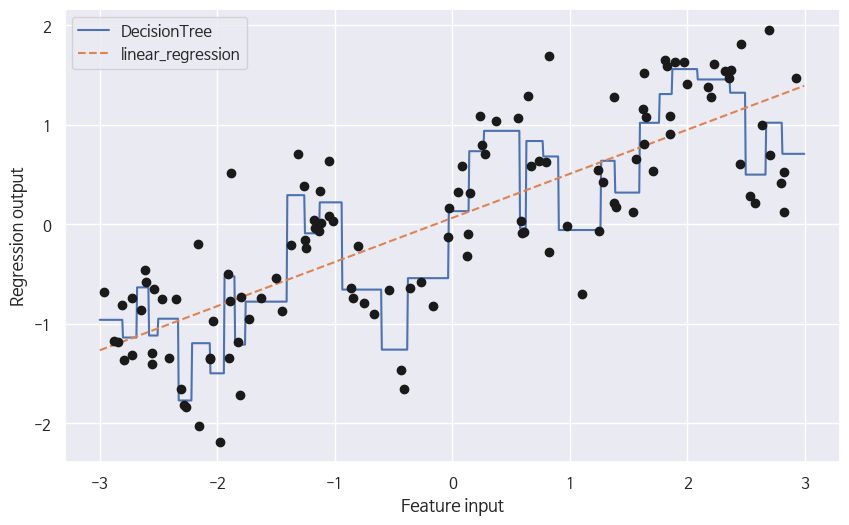

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='DecisionTree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='linear_regression')

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Feature input")
plt.legend(loc='best')


In [76]:
# 구간 경계 정의하기
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
         1.744,  2.333,  2.921])                                       ]


KBinsDiscretizer 는 한번에 여러 개의 특성을 적용할 수 있다. bin_edges 는 한 번에 여러 개의 특성에 적용할 수 있다.

In [77]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [78]:
# 희소 행렬을 밀집 배열로 변화 원본 데이터 포인트와 인토딩 결과를 비교
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [79]:
# encode = 'ordinal'
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

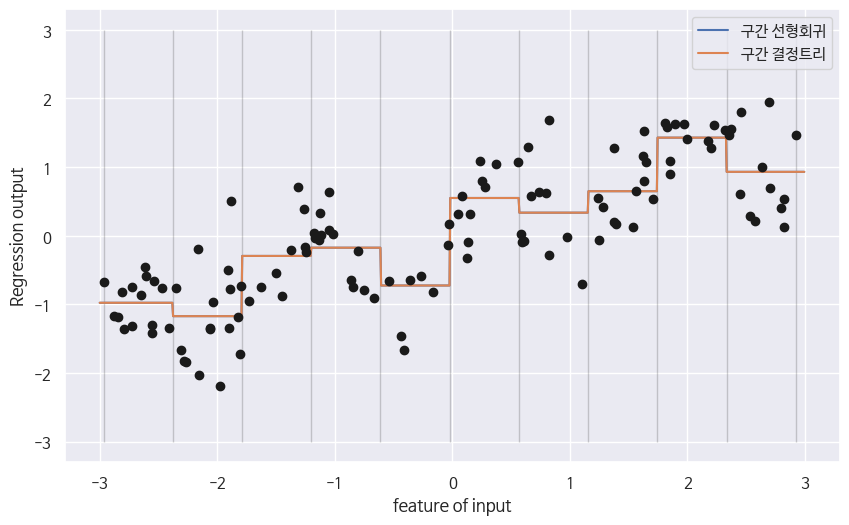

In [80]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)

plt.ylabel("Regression output")
plt.xlabel("feature of input")
plt.legend(loc='best')

# 4.5 상호작용과 다항식

특성을 풍부하게 나타내는 또 하나의 방법
선형모델은 wave 데이터셋의 각 구간에 대해 상숫값을 학습했다. 그런데 선형 모델은 이런 절편 외에도 기울기도 학습할 수 있다. 선형모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가하는 것이다. 이렇게 하면 11차원에 데이터셋이 만들어지고 모양은 다음과 같다.

In [81]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


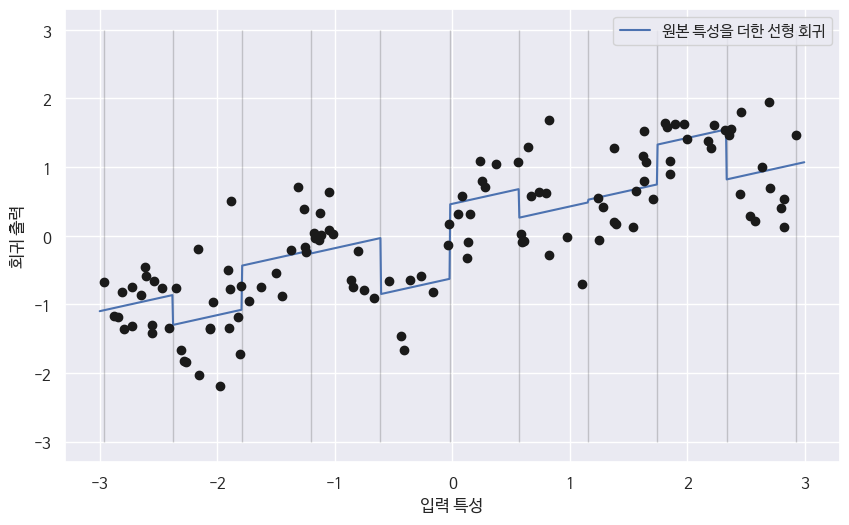

In [82]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show() # 책에는 없음

각 구간의 절편과 기울기를 학습했다. 학습된 기울기는 양수이며 모든구간에 걸쳐 동일하다. 즉, x축 특성이 하나이므로 기울기도 하나다. 기울기가 모든 구간에서 가으니 별로 유이해 보이지 않는다. 오히려 각 구간에서 다른 기울기를 가지는 게 좋을 것같다. 

\
데이터 포인트가 있는 구간과 x 축 사이의 상호작용 특성을 추가할 수 있다. 이 특성이 구간 특성과 원본 특성의 곱이다. 이 데이터셋을 만들어 보자.

In [86]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


원본 특성을 곱한 값을 더해 20개의 특성을 가진다. 

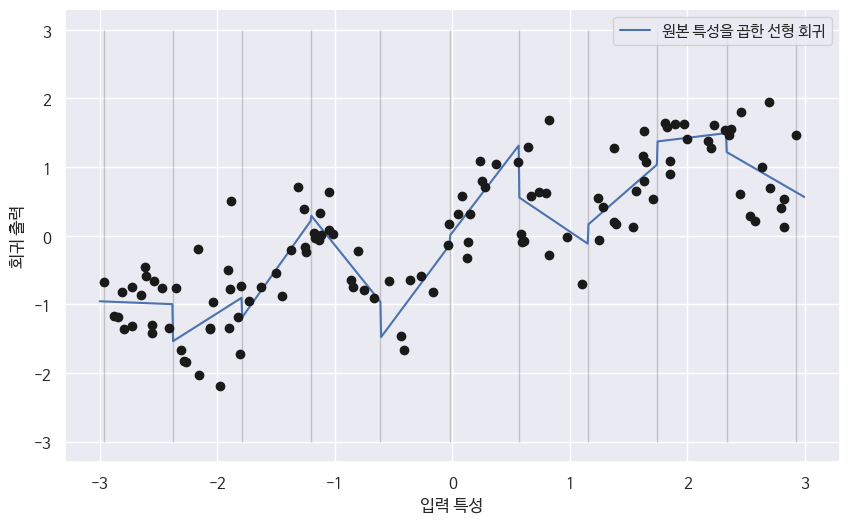

In [84]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

구간 나누기는 연속형 특성을 확장하는 방법 중 하나이다. 원본 특성의 다향식을 추가하는 방법도 있다. 특성 X가 주어지면. ** n 을 시도해 볼수있다.
이 방식이 preprocessing 모듈 PolynomialFeatures에 구현되었다.

In [88]:
from sklearn.preprocessing import PolynomialFeatures
# X ** 10 까지 고차항을 추가한다.
# 기본값이 'include_bias=True'는 저편에 해당하는 1인 특서을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [90]:
# 10 차원을 사용했으므로 10개의 특성이 만들어진다.
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [91]:
# X 와 X_poly 값 비교
print('X element:\n', X[:5])
print('X_poly element:\n', X_poly[:5])

X element:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly element:
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [92]:
print('항 이름: \n', poly.get_feature_names_out())

항 이름: 
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


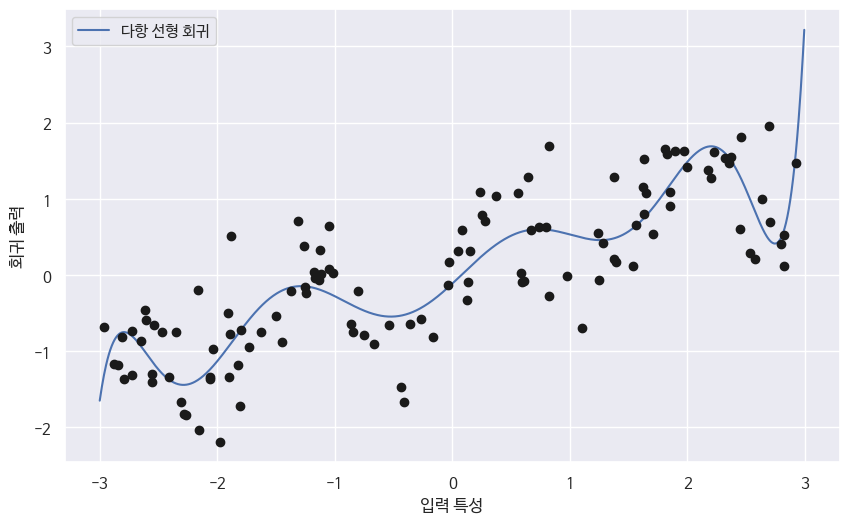

In [94]:
# 다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항회귀 모델이 된다.

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

다항식 트성은 1차원 데이터셋에서도 매우 부드러운 곡선을 그린다. 그러나 고차원 다항식은 데이터가 부조한 영역에서 너무 민감하게 동작한다.
비교를 위해 아무런 변화도 거치치 않은 원본데이터에 svm 모델을 학습시켜보자

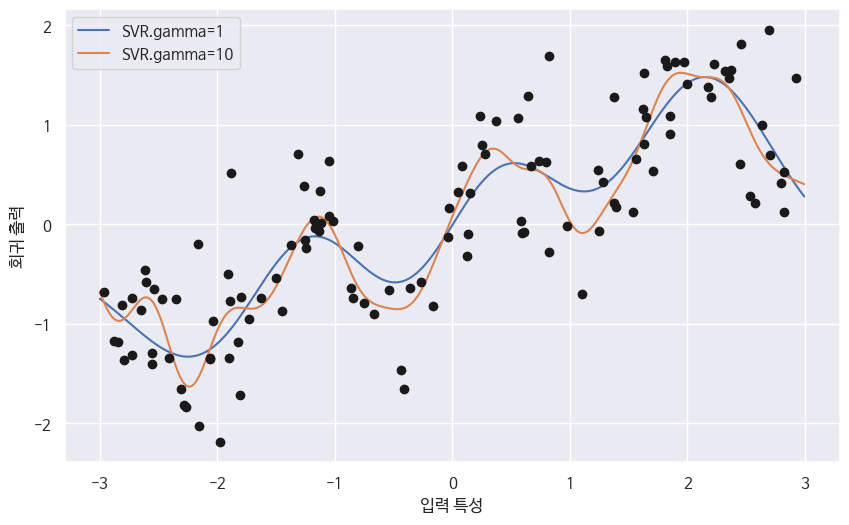

In [96]:
from sklearn.svm import SVR

for gamma in [1, 10]:
  svr = SVR(gamma=gamma).fit(X,y)
  plt.plot(line, svr.predict(line), label='SVR.gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

더 복잡한 모델인 커널을 SVM을 사용해 특서 데이터를 반환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측을 만들었다.

상호작용과 다항식을 위한 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋으 이용해보자. 이미 2장에서 이 데이터셋에 다항식 특성을 적용했다. 이제 이 특성들이 어떻게 구성되었는지 살펴보고, 다항식 특성이 얼마나 도움이 되는지 보겠다.
우선 데이터를 일고, minmaxscaler 사용해 스케일을 0-1 사이로 조정한다.

In [97]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [99]:
print("다항 특성 이름:\n", poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [100]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [101]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 없을 때 점수: 0.775
